In [1]:
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d as gaussf
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os

In [12]:
path_data_st = "./DATA/ST/data/"
dir_list = os.listdir(path_data_st)
print(dir_list,"\n")
print("Elementos dentro de la carpeta data de ST:",len(dir_list))

['data_ST_0.txt', 'data_ST_1.txt', 'data_ST_10.txt', 'data_ST_11.txt', 'data_ST_12.txt', 'data_ST_13.txt', 'data_ST_14.txt', 'data_ST_15.txt', 'data_ST_16.txt', 'data_ST_17.txt', 'data_ST_18.txt', 'data_ST_19.txt', 'data_ST_2.txt', 'data_ST_20.txt', 'data_ST_21.txt', 'data_ST_22.txt', 'data_ST_23.txt', 'data_ST_24.txt', 'data_ST_25.txt', 'data_ST_26.txt', 'data_ST_27.txt', 'data_ST_28.txt', 'data_ST_29.txt', 'data_ST_3.txt', 'data_ST_30.txt', 'data_ST_31.txt', 'data_ST_32.txt', 'data_ST_33.txt', 'data_ST_34.txt', 'data_ST_35.txt', 'data_ST_36.txt', 'data_ST_37.txt', 'data_ST_38.txt', 'data_ST_39.txt', 'data_ST_4.txt', 'data_ST_40.txt', 'data_ST_41.txt', 'data_ST_42.txt', 'data_ST_43.txt', 'data_ST_44.txt', 'data_ST_45.txt', 'data_ST_46.txt', 'data_ST_47.txt', 'data_ST_48.txt', 'data_ST_49.txt', 'data_ST_5.txt', 'data_ST_50.txt', 'data_ST_51.txt', 'data_ST_52.txt', 'data_ST_53.txt', 'data_ST_54.txt', 'data_ST_55.txt', 'data_ST_56.txt', 'data_ST_57.txt', 'data_ST_58.txt', 'data_ST_59.txt

In [3]:
path_data_n = "./DATA/N/data/"
dir_list = os.listdir(path_data_n)
print(dir_list,"\n")
print("Elementos dentro de la carpeta data de N:",len(dir_list))

['data_N_51.txt', 'data_N_45.txt', 'data_N_44.txt', 'data_N_50.txt', 'data_N_8.txt', 'data_N_46.txt', 'data_N_52.txt', 'data_N_53.txt', 'data_N_47.txt', 'data_N_9.txt', 'data_N_43.txt', '.DS_Store', 'data_N_57.txt', 'data_N_56.txt', 'data_N_42.txt', 'data_N_54.txt', 'data_N_40.txt', 'data_N_41.txt', 'data_N_55.txt', 'data_N_32.txt', 'data_N_26.txt', 'data_N_27.txt', 'data_N_33.txt', 'data_N_19.txt', 'data_N_25.txt', 'data_N_31.txt', 'data_N_30.txt', 'data_N_24.txt', 'data_N_18.txt', 'data_N_20.txt', 'data_N_34.txt', 'data_N_35.txt', 'data_N_21.txt', 'data_N_37.txt', 'data_N_23.txt', 'data_N_22.txt', 'data_N_36.txt', 'data_N_13.txt', 'data_N_12.txt', 'data_N_38.txt', 'data_N_10.txt', 'data_N_11.txt', 'data_N_39.txt', 'data_N_15.txt', 'data_N_29.txt', 'data_N_28.txt', 'data_N_14.txt', 'data_N_16.txt', 'data_N_17.txt', 'data_N_2.txt', 'data_N_58.txt', 'data_N_64.txt', 'data_N_65.txt', 'data_N_59.txt', 'data_N_3.txt', 'data_N_1.txt', 'data_N_0.txt', 'data_N_4.txt', 'data_N_62.txt', 'data_N

In [22]:
def read_files(path_data):
    dir_list = os.listdir(path_data)    
    df_list = []
    for elem in dir_list:
        print(elem)
        if not elem.startswith('.'):
            df_temp = pd.read_csv(path_data+elem,sep="\t")
            df_temp["filtered_p"] = gaussf(df_temp["p"], sigma=5.0)
            df_list.append(df_temp)
        
    return df_list

In [23]:
list_neptunes = read_files(path_data=path_data_n)

data_N14.txt
data_N28.txt
data_N29.txt
data_N15.txt
data_N8.txt
data_N17.txt
data_N16.txt
data_N9.txt
data_N12.txt
.DS_Store
data_N13.txt
data_N39.txt
data_N11.txt
data_N10.txt
data_N38.txt
data_N63.txt
data_N62.txt
data_N60.txt
data_N48.txt
data_N49.txt
data_N61.txt
data_N59.txt
data_N65.txt
data_N64.txt
data_N58.txt
data_N56.txt
data_N42.txt
data_N43.txt
data_N57.txt
data_N41.txt
data_N55.txt
data_N54.txt
data_N40.txt
data_N44.txt
data_N50.txt
data_N51.txt
data_N45.txt
data_N53.txt
data_N47.txt
data_N46.txt
data_N52.txt
data_N2.txt
data_N35.txt
data_N21.txt
data_N20.txt
data_N34.txt
data_N3.txt
data_N1.txt
data_N22.txt
data_N36.txt
data_N37.txt
data_N23.txt
data_N0.txt
data_N4.txt
data_N27.txt
data_N33.txt
data_N32.txt
data_N26.txt
data_N5.txt
data_N7.txt
data_N18.txt
data_N30.txt
data_N24.txt
data_N25.txt
data_N31.txt
data_N19.txt
data_N6.txt


In [24]:
list_neptunes[0]

,wl,p,filtered_p
0,14.000000,0.187021,0.218241
1,13.980427,0.230532,0.218326
2,13.960909,0.235136,0.218489
3,13.941446,0.219394,0.218718
4,13.922037,0.228185,0.218998
...,...,...,...
32615,0.300036,0.155197,0.155196
32616,0.300027,0.155198,0.155196
32617,0.300018,0.155198,0.155197
32618,0.300009,0.155199,0.155197


In [25]:
def graph(x,y,y_f):
    wl_ticks = np.arange(0.3,14.5,3)
    plt.figure(-3, (7,4))
    plt.clf()
    ax = plt.subplot(111)
    plt.semilogx(x, y, "-", color='orange', lw=1.0)
    plt.semilogx(x, y_f, color="blue", lw=1.25)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xticks(wl_ticks)
    plt.xlim(0.3, 14.0)
    plt.ylabel("Transit depth (Rp/Rs)$^2$ (%)")
    plt.xlabel("Wavelength (um)")
    plt.show()

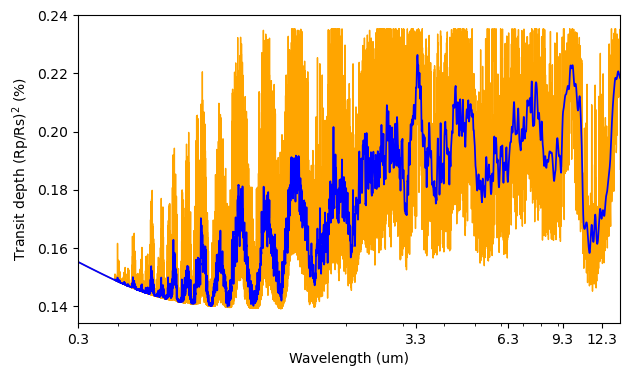

In [26]:
graph(list_neptunes[0].wl, list_neptunes[0].p, list_neptunes[0].filtered_p)

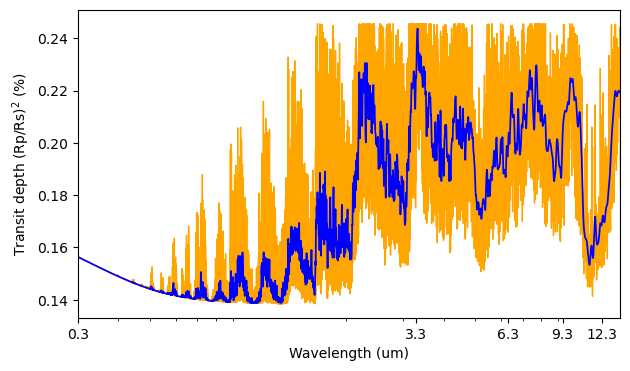

In [42]:
graph(list_neptunes[1].wl, list_neptunes[1].p, list_neptunes[1].filtered_p)

In [47]:
def interpolation(df_list):
    
    f = []
    x = []
    for elem in df_list:
        x_temp = elem.wl
        y_temp = elem.filtered_p
        f.append(interp1d(x_temp,y_temp,kind='cubic'))
        
    x_new = np.linspace(min(df_list[0].wl), max(df_list[0].wl), 3000, endpoint=True)
    data_spec = [i(x_new) for i in f]

    plt.semilogx(df_list[2].wl, df_list[2].p, color="y",alpha=0.5)
    plt.semilogx(df_list[2].wl, df_list[2].filtered_p, color="blue")
    plt.semilogx(x_new, data_spec[2], color="r")
    
    return data_spec, x_new

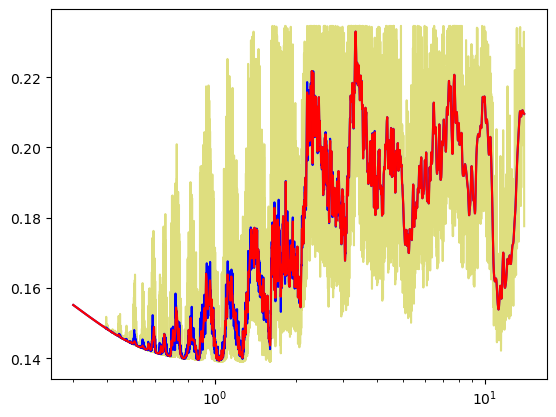

In [48]:
spec_neptunes, x_neptunes = interpolation(list_neptunes)

In [38]:
spec_neptunes[0]

array([0.15519716, 0.15482214, 0.15445148, ..., 0.21826985, 0.21825307,
       0.21824119])

In [45]:
def save_data(data_spec, x, exoplanet_type):
    data = pd.DataFrame(data_spec, columns=x)
    data.insert(0, "exoplanet_type", exoplanet_type)
    data.to_csv(f'./DATA/data_{exoplanet_type}.csv',index=False)
    return data

In [46]:
spec_neptunes_df = save_data(spec_neptunes, x_neptunes, 'N')
spec_neptunes_df.head()

,exoplanet_type,0.3000004285720408,0.3045686178256013,0.3091368070791618,0.3137049963327223,0.3182731855862828,0.3228413748398433,0.3274095640934038,0.33197775334696433,0.33654594260052484,...,13.958886296717955,13.963454485971514,13.968022675225075,13.972590864478637,13.977159053732196,13.981727242985757,13.986295432239316,13.990863621492878,13.995431810746439,13.999999999999998
0,N,0.155197,0.154822,0.154451,0.154088,0.153730,0.153380,0.153035,0.152696,0.152364,...,0.218510,0.218464,0.218421,0.218383,0.218348,0.218317,0.218291,0.218270,0.218253,0.218241
1,N,0.156432,0.156022,0.155617,0.155220,0.154831,0.154448,0.154072,0.153703,0.153340,...,0.219301,0.219282,0.219264,0.219247,0.219232,0.219219,0.219208,0.219198,0.219191,0.219186
2,N,0.155182,0.154809,0.154441,0.154079,0.153724,0.153376,0.153033,0.152697,0.152366,...,0.209646,0.209628,0.209612,0.209597,0.209583,0.209572,0.209562,0.209554,0.209548,0.209543
3,N,0.156328,0.155922,0.155520,0.155126,0.154739,0.154359,0.153986,0.153619,0.153259,...,0.221794,0.221765,0.221738,0.221714,0.221692,0.221672,0.221656,0.221642,0.221631,0.221624
4,N,0.156240,0.155838,0.155441,0.155051,0.154668,0.154292,0.153923,0.153561,0.153205,...,0.219771,0.219745,0.219722,0.219700,0.219680,0.219663,0.219648,0.219636,0.219627,0.219620
